# Data analysis with python

In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('trip_data.csv')

### Understading the data

In [2]:
df.head()

,ride_id,user_type,bike_type,start_station_name,end_station_name,started_at,ended_at,ride_length,week_day
0,0001F6D5CEC173C8,member,docked_bike,Racine Ave & Belmont Ave,Broadway & Cornelia Ave,2020-11-16 20:44:02,2020-11-16 20:50:12,6,2
1,0002188B9DCE3604,member,classic_bike,Broadway & Belmont Ave,Broadway & Waveland Ave,2020-12-16 20:21:28,2020-12-16 20:27:03,6,4
2,0002C71847CA5F09,member,docked_bike,Wells St & Hubbard St,Fairbanks St & Superior St,2020-08-26 15:25:49,2020-08-26 15:37:16,12,4
3,0003E3999EB07A52,member,docked_bike,Sheridan Rd & Noyes St (NU),Chicago Ave & Dempster St,2020-10-10 15:42:58,2020-10-10 15:58:37,16,7
4,000412137A67C9D0,casual,docked_bike,Francisco Ave & Foster Ave,Francisco Ave & Foster Ave,2020-11-28 14:59:42,2020-11-28 15:29:59,30,7


In [3]:
df.shape

(1738481, 9)

In [4]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,ride_length,week_day
count,1738481.00,1738481.00
mean,22.30,4.17
std,39.03,2.09
min,1.00,1.00
25%,8.00,2.00
50%,14.00,4.00
75%,25.00,6.00
max,1440.00,7.00


In [5]:
df['user_type'].describe()

count     1738481
unique          2
top        member
freq      1034147
Name: user_type, dtype: object

In [6]:
df[df['user_type'] =='member'].describe()

,ride_length,week_day
count,1034147.00,1034147.00
mean,14.77,4.11
std,18.25,1.98
min,1.00,1.00
25%,6.00,2.00
50%,11.00,4.00
75%,19.00,6.00
max,1440.00,7.00


In [7]:
df[df['user_type'] =='casual'].describe()

,ride_length,week_day
count,704334.00,704334.00
mean,33.36,4.26
std,55.37,2.24
min,1.00,1.00
25%,11.00,2.00
50%,20.00,4.00
75%,37.00,6.00
max,1440.00,7.00


Descriptive statistics for casual customers have a lower total ride_lenth than member customers, but the 3rd quartile shows that over 75% of casual customers have a much higher ride_length than member customers. On average, customers in the casual group have a 2.7 times higher ride_length

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738481 entries, 0 to 1738480
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   user_type           object
 2   bike_type           object
 3   start_station_name  object
 4   end_station_name    object
 5   started_at          object
 6   ended_at            object
 7   ride_length         int64 
 8   week_day            int64 
dtypes: int64(2), object(7)
memory usage: 119.4+ MB


In [9]:
df.nunique()

ride_id               1738481
user_type                   2
bike_type                   3
start_station_name        679
end_station_name          680
started_at            1504126
ended_at              1491751
ride_length              1246
week_day                    7
dtype: int64

In [10]:
df.isnull().sum()

ride_id               0
user_type             0
bike_type             0
start_station_name    0
end_station_name      0
started_at            0
ended_at              0
ride_length           0
week_day              0
dtype: int64

In [11]:
trip = df.copy()

In [12]:
#df['Col4'] = (df['Col2'] * df['Col3']).where(df['Col1'] > 0, 0)
def product(row):
    if 1< row['week_day'] < 7:
        return 'weekday'
    else:
        return'weekend'
trip['day_type'] = trip.apply(product, axis=1)


In [13]:
#correlation = trip.corr()
# sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)
# không cần quan tâm, bước này thừa vì ride_length và week_day không có nhiều relation
# sns.pairplot(trip)
# sns.relplot(x='ride_length', y='week_day', hue = 'user_type', data=trip)

# Customer difference

In [14]:
import datetime as dt
trip['started_at'] = pd.to_datetime(trip['started_at'])

In [15]:
trip['month'] = trip['started_at'].dt.month
trip['year'] = trip['started_at'].dt.year
#trip['month_year'] = trip['month'].map(str) + '-' + trip['year'].map(str)

In [16]:
trip

,ride_id,user_type,bike_type,start_station_name,end_station_name,started_at,ended_at,ride_length,week_day,day_type,month,year
0,0001F6D5CEC173C8,member,docked_bike,Racine Ave & Belmont Ave,Broadway & Cornelia Ave,2020-11-16 20:44:02,2020-11-16 20:50:12,6,2,weekday,11,2020
1,0002188B9DCE3604,member,classic_bike,Broadway & Belmont Ave,Broadway & Waveland Ave,2020-12-16 20:21:28,2020-12-16 20:27:03,6,4,weekday,12,2020
2,0002C71847CA5F09,member,docked_bike,Wells St & Hubbard St,Fairbanks St & Superior St,2020-08-26 15:25:49,2020-08-26 15:37:16,12,4,weekday,8,2020
3,0003E3999EB07A52,member,docked_bike,Sheridan Rd & Noyes St (NU),Chicago Ave & Dempster St,2020-10-10 15:42:58,2020-10-10 15:58:37,16,7,weekend,10,2020
4,000412137A67C9D0,casual,docked_bike,Francisco Ave & Foster Ave,Francisco Ave & Foster Ave,2020-11-28 14:59:42,2020-11-28 15:29:59,30,7,weekend,11,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1738476,FFFF3DD0C2650C65,member,docked_bike,Desplaines St & Kinzie St,Mies van der Rohe Way & Chicago Ave,2020-08-26 18:37:28,2020-08-26 18:52:45,15,4,weekday,8,2020
1738477,FFFF3DE4429CC609,member,electric_bike,Clark St & Bryn Mawr Ave,Clarendon Ave & Junior Ter,2020-09-04 17:05:39,2020-09-04 17:17:24,12,6,weekday,9,2020
1738478,FFFF7E23D2915E21,casual,docked_bike,Wells St & Huron St,Sheridan Rd & Noyes St (NU),2020-08-21 10:00:46,2020-08-21 11:47:56,107,6,weekday,8,2020
1738479,FFFF9BD5C4157AAE,member,docked_bike,Warren Park East,2112 W Peterson Ave,2020-11-05 05:25:50,2020-11-05 05:41:41,16,5,weekday,11,2020


Text(0, 0.5, '')

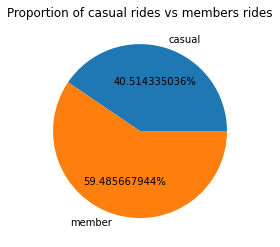

In [17]:
trip.groupby('user_type')['user_type'].count().plot(kind = 'pie', autopct='%7.9f%%')
plt.title('Proportion of casual rides vs members rides')
plt.ylabel("")

<AxesSubplot:xlabel='user_type', ylabel='ride_length'>

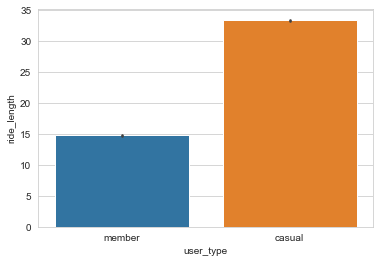

In [18]:
sns.set_style('whitegrid')
sns.barplot(x='user_type', y ='ride_length', estimator=np.mean, data=trip)

In [19]:
trip_orderedbymonth =trip.sort_values('month')

<AxesSubplot:xlabel='month', ylabel='ride_length'>

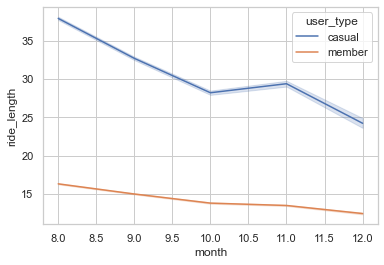

In [20]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=trip_orderedbymonth, x="month", y="ride_length", hue= 'user_type')

In general, the average cycling time decreased over time, but the average cycling time of the casual customer group fluctuated more than the member group. It is possible to withdraw the group of casual customers who sometimes use bicycles to move, the travel time is longer than the member customer group.

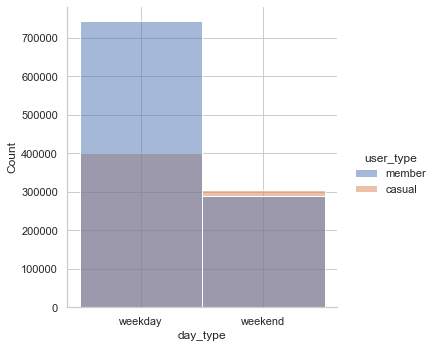

In [21]:
sns.displot(data = trip, x = 'day_type', hue = 'user_type')

<AxesSubplot:xlabel='week_day', ylabel='count'>

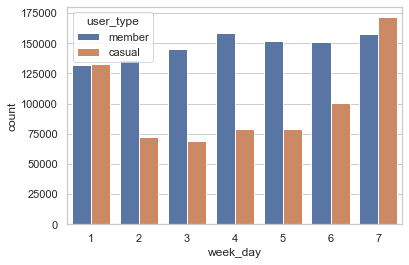

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='week_day', hue ='user_type', data=trip )

Customer group members use Cyclistic regularly on the same days of the week. The casual customer group is less likely to use the service on weekdays, nearly 50% lower than the member customers; Using spikes on weekends, there is a little higher in using times than the member customer group.

## Key takes away
- Casual: This group of customers accounts for nearly 41% of the total data, with an average of 2.7 times longer cycling time than member customers. Usually use the service on weekends compared to weekdays. They may be newcomers to the area or tourists, unfamiliar with the city's topography. Are slowpace riders, roaming to enjoy the view or get used to the city terrain
- Member: These are customers might be who are familiar with the city's terrain, are residents who are working or going to school. Usually used on weekdays, because of familiarity with the terrain, the trajectory is usually short and straight


# Ride preference

In [23]:
trip['bike_type'].describe()

count         1738481
unique              3
top       docked_bike
freq          1330885
Name: bike_type, dtype: object

In [24]:
trip['bike_type'].unique()

array(['docked_bike', 'classic_bike', 'electric_bike'], dtype=object)

<AxesSubplot:xlabel='bike_type', ylabel='count'>

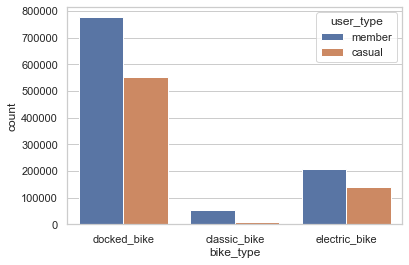

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='bike_type', hue ='user_type', data=trip )

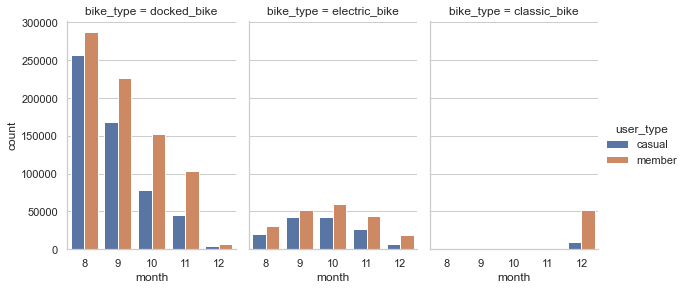

In [26]:
sns.set_theme(style="whitegrid")
sns.catplot(x="month", hue="user_type", col="bike_type",
                data=trip_orderedbymonth, kind="count",
                height=4, aspect=.7);

# Recommendations

The data provided is still insufficient to confirm the hypotheses. But based on that we can make some suggestions for the time being.
- Special promotion for customers who are members on weekends, discount based on rental hours...
- Strengthen bicycle rental points at some famous tourist spots to attract tourists.
- Reduce the number of docked_bike rentals, increase the number of electric_bikes. If there is a problem with inventory, additional benefits for customers members can freely choose the type of bike they want.The number of classic_bike rentals can be slightly increased in November and December to serve loyal customers
